# Lecture Note: Portfolio Theory
 
## By Albert S. (Pete) Kyle

## BUFN400 Fall 2024---University of Maryland 

$\def \sm {} \renewcommand{\sm}{ {\scriptstyle{\text{*}}}}$ 
$\def \mm {} \renewcommand{\mm}{{\scriptsize @}}$
$\def \E {} \renewcommand{\E}{\mathrm{E}}$
$\def \e {} \renewcommand{\e}{\mathrm{e}}$
$\def \drm {} \renewcommand{\drm}{\mathrm{\, d}}$
$\def \var {} \renewcommand{\var}{\mathrm{var}}$
$\def \cov {} \renewcommand{\cov}{\mathrm{cov}}$
$\def \corr {} \renewcommand{\corr}{\mathrm{corr}}$
$\def \stdev {} \renewcommand{\stdev}{\mathrm{stdev}}$
$\def \t {} \renewcommand{\t}{^{\mathsf{T}}}$
$\def \comma {} \renewcommand{\comma}{\, , \,}$
$\def \vec {} \renewcommand{\vec}[1]{\mathbf{#1}}$
$\def \skew {} \renewcommand{\skew}{\mathrm{skew}}$
$\def \kurt {} \renewcommand{\kurt}{\mathrm{kurt}}$
$\def \prob {} \renewcommand{\prob}{\textrm{prob}}$
$\def \midx {} \renewcommand{\midx}{\, \mid \,}$


In [14]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

import pandas as pd

import sys
import datetime
import timeit

print('Python version ' + sys.version)
print('NumPy version ' + np.__version__)

timestamp = datetime.datetime.now().strftime('%Y-%m%d-%H%M')
print("Timestamp:", timestamp)
tstart = timeit.default_timer()

Python version 3.11.8 | packaged by conda-forge | (main, Feb 16 2024, 20:40:50) [MSC v.1937 64 bit (AMD64)]
NumPy version 1.26.4
Timestamp: 2024-1101-1715


### Risk Aversion and Expected Utility

It is generally recognized that investors **prefer more to less** but are **risk averse**.  Intuitively, this means that investors like a higher mean and a lower variance on portfolio returns. To model this tradoff between risk and return more scientifically, economists use the concept of **expected utility**. Economists assume that investors maximize the expected utility of their wealth. Lettin $W$ denote an investor's random future wealth and $u(.)$ denote an investor's utility function, expected utility can be written. $\mathrm{E}[u(W)]$. Preferring more to less makes the utility function **monotonically increasing**. Risk aversion makes the utility function **concave**.

There is a huge amount of finance and economics research relating to modeling risk aversion using utility functions.  Here are some theoretical issues:

1. Even if the expected return on an investment is infinite, expected utility may be finite. This relates to the famous **St. Petersburg Paradox** (google it!).

2. Expected utility gives the same implications if the utility function is subjected to a monotonically increasing linear transformation: maximizing $u(W)$ has the same solution as maximizing $a_0 + a_1 \sm u(W)$ if $a_1 > 0$.

3. If $W$ is random future wealth, a quadratic utility function of the form $u(W) = W - \rho \sm W^2$ is analytically tractable, generates **mean-variance** preferences, captures risk aversion with the squared term, but is not monotonically increasing for all values of wealth. The ** marginal utility of wealth** (derivative $u'(W)$) is negative for large values of wealth.

4. A popular choice is the **exponential utility** function $u(W) = -\exp (-\rho \sm W)$. This utility functions has several interesting properties: (A) Utility is finite even if wealth is negative. (B) If wealth is normally distributed, maximizing this utility function is equivalent to maximizing $\mathrm{E}[W] - \rho \sm \mathrm{var}[W]$. (C) Unrealisitically, investors have **constant absolute risk aversion** in the sense that adding a constant to wealth does not affect investments in risky assets.

5. Popular utility functions of the form $u(W) = \frac{W^{1-\rho} - 1}{1-\rho}$ are called **power utility**. These utility functions have **constant relative risk aversion**, which means that demand for risky assets is constant as a proportion of wealth. A higher value of $\rho$ implies greater risk aversion. Wealth is not allowed to be negative; this implies negatively infinite utility for negative wealth. Utility can be negative if $\rho > 1$; the minimum value for utility is zero if $0 < \rho < 1$ and $W \ge 0$. Risk aversion of $\rho \rightarrow 0$ implies **risk neutrality**, which mean investors simply maximize expected return, subject to a constraint that wealth cannot be negative. 

6. When $\rho \rightarrow 1$, it can be shown that power utility becomes equivalent to log utility. This is a very popular utility function, one we shall look at in detail.


### Problem 0 (Optional, for students who like math)

1. Suppose random future wealth $W$ has a distribution with outcome 100,000 with probability $1/2$, 200,000 with probability $1/4$, 400,000 with probability $1/16$, $\ldots$, $100,000*2^N$ with probability $1/2^{N+1}$, $\ldots$. Show that this utility has infinite expecttion, but the expectation is finite if the investor has a log utility function $u(W) = \log(W)$.

2. Draw plots for quadratic utility, exponential utility, log utility, and power utility as functions of wealth.  For power utility, consider cases where $\rho < 1$ and $\rho > 1$.

3. The degree of **absolute risk aversion** is often defined as $\frac{u''(W)}{u'(W)}$. The degree of **relative risk aversion** is defined as $\frac{u''(W)}{W \sm u'(W)}$. Both absolute and relative risk aversion are functions of wealth. Show that the degree of constant or absolute risk aversion is not affected by subjecting the utility function to a monotonically increasing linear transformation. 

4. Show that exponential utility exhibits constant absolute risk aversion in the sense that this function of wealth is the constant function.  

5.  Show that power utility exhibits constant relative risk aversion.

6.  Show that power utility becomes equivalent to log utility in the limint as $\rho \rightarrow 1$.

### Portfolio problem

Consider a simple portfolio problem in which an investor invests a fraction of wealth $x$ in a risky asset with random gross random return $R$ and invests $1-x$ in a safe asset with nonrandom return $R_f$. The portfolio return is $(1-x) \sm R_f + x \sm R$. If initial wealth is $W_0$, random future wealth can be written $W_1 = W_0 \sm \bigl( (1-x) \sm R_f + x \sm R \bigr)$. If $x < 0$, the investor takes a short position in the risky asset. If $x > 1$, the investor borrows money at rate $r_f$ to invest more than 100 percent of wealth in the risky asset.

The investor chooses $x$ to solve 

$$
\max_{x} \; \E \Bigl[ \textrm{u} \Bigl( W_0 \sm \bigl( R_f + x \sm (R - R_f) \bigr) \Bigr) \Bigr].
$$

With constant relative risk aversion, it can be shown that $W_0$ factors out of the problem, making it easier to solve for $x$, which is not a function of initial wealth $W_0$ in this case.

The above optimization problem assumes that the investor makes one investment decision and does not change it over time.  In practice, investors change their decisions over time, using a **dynamic trading strategy**. This is important because investors may change their investment holding over time for at least two reasons:

1. If investors target percentage holdings in various assets, say 60 percent stocks and 40 percent bonds, the actual holdings need to be **rebalanced** if asset prices change. For example, if stocks rise and bonds fall, an investor who initially held 60 percent stocks and 40 percent bonds will have more than 60 percent in stocks and less than 40 percent bonds after the price changes. The investor will need to sell stocks and buy bonds to **rebalance**.

2. Investors may change their estimates of expected returns on various assets over time as new information comes into the market. This requires a **dynamic trading strategy**.

There are two ways to deal with thes issue:

1.  Investors can delegate trading to an asset manager. One popular way to do this is with **mutual funds** and **exchange traded funds** (**ETFs**). For example, **target date retirement funds** automatically rebalance between stocks and bonds over time, without requiring reoptimization by the investor. **Leveraged ETFs** are speculative instruments which allow leverage on both the long and short sides, such as 200 percent long stocks (and 100 percent short a risk-free asset) or 100 percent short stocks (and 200 percent long the risk-free asset).

2. The investor can reoptimize the portfolio over time.  This creates a potentially difficult optimization problem in which the investor must take into account at date $t$ how choices are going to  be made in the future. A great deal of finance research addresses this issue using **dynamic programming**.



### Define utility functions

In [ ]:

def u_crra(w, rho):
    utility = np.nan
    if rho == 1.0:
        utility = np.log(w)
    elif rho >= 0.00:
        utility = (w**(1.00 - rho) - 1.00) / (1.00 - rho)    
    else:
        assert False, f"Risk aversion rho should be nonnegative, but {rho = }."    
    return utility

def u_inv_crra(u, rho):
    w = np.nan
    if rho == 1.00:
        w = np.exp(u)
    elif rho >= 0.00:
        w = ((1.00 - rho) * u + 1.00)**( 1.00 / (1.00 - rho))
    else:
        assert False, f"Risk aversion rho should be nonnegative, but {rho = }."    
    return w    





g = lambda r: r
if rho != 1.00:
    g = lambda u: np.log(((1.00 - rho) * u + 1.00)**(1.00 / (1.00 - rho)))



Expected gross return: Should be the same: 1.0618365465453596 1.0618365465453594
[0.03       0.030302   0.03059895 0.03089086 0.03117777 0.0314597
 0.03173669 0.03200876 0.03227594 0.03253825 0.03279571 0.03304836
 0.0332962  0.03353927 0.03377758 0.03401116 0.03424003 0.0344642
 0.03468369 0.03489853 0.03510872 0.03531429 0.03551525 0.03571162
 0.03590341 0.03609064 0.03627331 0.03645146 0.03662507 0.03679418
 0.03695879 0.03711891 0.03727456 0.03742574 0.03757246 0.03771473
 0.03785257 0.03798597 0.03811495 0.03823952 0.03835968 0.03847544
 0.0385868  0.03869377 0.03879636 0.03889457 0.0389884  0.03907786
 0.03916295 0.03924368 0.03932005 0.03939205 0.03945969 0.03952298
 0.03958191 0.03963648 0.03968669 0.03973255 0.03977405 0.03981119
 0.03984397 0.03987238 0.03989643 0.03991611 0.03993142 0.03994234
 0.03994889 0.03995105 0.03994882 0.03994219 0.03993116 0.03991571
 0.03989585 0.03987156 0.03984284 0.03980968 0.03977206 0.03972998
 0.03968343 0.03963239 0.03957687 0.03951683 0.039

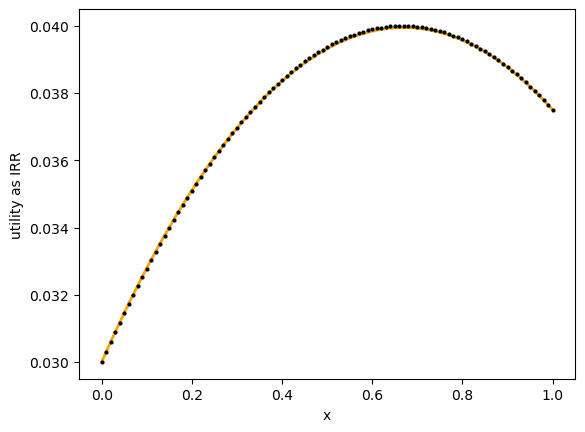

In [135]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

rf = 0.03
pi = 0.03
sigma = 0.30
rho = 0.5
W0 = 1.0

u = np.log
if rho != 1.00:
    u = lambda w: (w**(1.00 - rho) - 1.00) / (1.00 - rho)

g = lambda r: r
if rho != 1.00:
    g = lambda u: np.log(((1.00 - rho) * u + 1.00)**(1.00 / (1.00 - rho)))

# x = np.array([-0.20, 0.00, 0.60, 1.00, 1.50])
x = np.linspace(start=0.00, stop=1.00, num=101, endpoint=True)

# Need to define scale correctly, taking into accout "sigma^2/2" term:
# Expected return on risky asset should be:
ER = np.exp(rf + pi) 
# This expected return is achieved with the following choice of scale variable:
scale = np.exp(rf + pi - 0.50 * sigma**2)
# Define a lognormal distribution for R with the expected return Rf + pi and standard deviation sigma:
Rdist = scipy.stats.lognorm(scale=scale, s=sigma)

def Eu(x, u, Rdist, W0, rf):
    x = np.asarray(x)
    # The function Rdist.expect necessitates a slow Python loop:
    Rf = np.exp(rf)
    results = []
    for x0 in x:
        def f(R):
            return u(W0 * (Rf + x0 * (R - Rf)))
        result = Rdist.expect(f)
        # if np.isnan(result):
        #     result = -np.inf
        results.append(result)
        res = np.array(results)
        res = g(res)
    return res 

def Eu_quadratic(x, rf, pi, rho, sigma):
    res = rf + x * pi - 0.50  * rho * (x * sigma)**2
    return res

print("Expected gross return: Should be the same:", ER, Rdist.expect())

Eu0 = Eu(x, u, Rdist, W0, rf)
Eu0_quadratic = Eu_quadratic(x, rf, pi, rho, sigma)

print(Eu0)
print(Eu0_quadratic)
print(Eu0 - Eu0_quadratic)

plt.plot(x, Eu0, 'orange', lw=2.0)
plt.plot(x, Eu0_quadratic, 'ko', ms=2.0)
plt.xlabel('x')
plt.ylabel('utility as IRR')
# plt.yscale('log')
plt.show()


### Calculation of Optimal Portfolio

Now consider calculating the optimal portfolio using `scipy.optimize.minimize`.

The following cell does the following:

1. Defines an explicit gradient function (in this case with only one parameter) to be used in the optimization.

2.

In [136]:

x0 = np.array([0.30])

def fEu(x, u, Rdist, W0, rf):
    res = Eu(x, u, Rdist, W0, rf)
    print(f"{x=}, fEu={res}")
    return -res

def gradEu(x, u, Rdist, W0, Rf):
    Rf = np.exp(rf)
    # The function Rdist.expect necessitates a slow Python loop:
    results = []
    for xi in x:
        def gradf(R):
            return W0 * x0 / (W0 * (Rf + xi * (R - Rf)))
        result = Rdist.expect(gradf)
        if np.isnan(result):
            result = -np.inf
        results.append(result)
    res = np.array(results)
    print(f"{xi=}, gradEu={res}")
    return -res 

def hessEu(x, u, Rdist, W0, Rf):
    assert False, "PKError: not implemented yet!"
    return None

# minimum position in single asset. Zero means no short sales.
min_frac = 0.00
 # maximum position in single asset. One means it is okay to invest entire portfolio in one asset. 
max_frac = 1.00

individual_bounds = scipy.optimize.Bounds(min_frac , max_frac )

# print(f"{x0 = }\n{individual_bounds = }")

eps = 1e-4

results = scipy.optimize.minimize(fEu, x0, args=(u, Rdist, W0, Rf), method='trust-constr', 
                                  jac=gradEu, 
                                  hess=None,
                                  constraints=None, 
                                  bounds=individual_bounds, 
                                  options={'verbose' : 0, 'gtol' : eps, 'xtol' : eps, 'barrier_tol' : eps})

print(f"{results = }")

print(f"\n{results['x'].dtype=}")
print(f"{results['x']=}")

x=array([0.3]), fEu=[0.8234154]
xi=0.3, gradEu=[0.29090424]
xi=0.5363856084515496, gradEu=[0.29391736]
x=array([0.53638561]), fEu=[0.62284247]
xi=0.9974636163227575, gradEu=[0.30900977]
x=array([0.99746362]), fEu=[0.04195135]
xi=0.7861049778052102, gradEu=[0.30033757]
x=array([0.78610498]), fEu=[0.35276076]
xi=0.636978486913631, gradEu=[0.29607294]
x=array([0.63697849]), fEu=[0.52301996]
xi=0.5750564051388426, gradEu=[0.29468136]
x=array([0.57505641]), fEu=[0.58568222]
xi=0.6748192433932335, gradEu=[0.29702901]
x=array([0.67481924]), fEu=[0.48260983]
xi=0.6100511970831091, gradEu=[0.29544189]
x=array([0.6100512]), fEu=[0.55077244]
xi=0.5868120581958056, gradEu=[0.29492943]
x=array([0.58681206]), fEu=[0.57409582]
xi=0.6231886957348352, gradEu=[0.29574473]
x=array([0.6231887]), fEu=[0.53733254]
xi=0.6231886957348353, gradEu=[0.29574473]
x=array([0.6231887]), fEu=[0.53733254]
xi=0.5944956567086453, gradEu=[0.2950956]
x=array([0.59449566]), fEu=[0.56644678]
xi=0.5944956567086455, gradEu=[0

c:\Users\askyl\anaconda3\envs\a202402f\Lib\site-packages\scipy\optimize\_differentiable_functions.py:231: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


xi=0.5871242732518035, gradEu=[0.29493612]
x=array([0.58712427]), fEu=[0.57378619]
xi=0.5869432881489588, gradEu=[0.29493224]
x=array([0.58694329]), fEu=[0.57396569]
xi=0.5868838593187636, gradEu=[0.29493096]
x=array([0.58688386]), fEu=[0.57402462]
xi=0.9069343001537495, gradEu=[0.30486629]
x=array([0.9069343]), fEu=[0.18801917]
xi=0.9069343001537497, gradEu=[0.30486629]
x=array([0.9069343]), fEu=[0.18801917]
xi=0.6351537809030682, gradEu=[0.2960289]
x=array([0.63515378]), fEu=[0.52492614]
xi=0.6351537809030683, gradEu=[0.2960289]
x=array([0.63515378]), fEu=[0.52492614]
xi=0.5973001307777968, gradEu=[0.29515706]
x=array([0.59730013]), fEu=[0.5636397]
xi=0.5973001307777969, gradEu=[0.29515706]
x=array([0.59730013]), fEu=[0.5636397]
xi=0.5892305286867753, gradEu=[0.29498139]
x=array([0.58923053]), fEu=[0.57169478]
xi=0.5874228581474025, gradEu=[0.29494252]
x=array([0.58742286]), fEu=[0.57348999]
xi=0.5870136312005739, gradEu=[0.29493374]
x=array([0.58701363]), fEu=[0.57389593]
xi=0.58692

### Log Utility with Geometric Brownian Motion

These issues can be dealt with in a simpler way when the investor has log utility.

With log utility, a dynamic optimization problem separates itself additively into separate subproblems.  For example, suppose there are two time intervals $\Delta t_1$ and $\Delta t_2$, with risky returns $R_1$ and $R_2$. Log utility separates additively in the following way:
 
$$
\begin{align}
\log \Bigl( W_0 \sm \bigl( R_f + x_1 \sm (R_1 - R_f) \bigr) \sm \bigl( R_f + x_2 \sm (R_2 - R_f) \bigr) \Bigr) \qquad \qquad \qquad \qquad \qquad \\
= \log W_0 + \log \bigl( R_f + x_1 \sm (R_1 - R_f) \bigr) 
+ \log \bigl( R_f + x_2 \sm (R_2 - R_f) \bigr).
\end{align} 
$$

Because of the additive separability, there is no interaction between the investment solutions in different subperiods: The investment performance in the first period has no effect on the optimal portfolio choise in the second period.  This is not true of other utility functions; for other utility function, the optimal portfolio in the second period may depend on the returns in the first period.

The portfolio problem simplifies even further when the risky asset's cumulative return follows geometric Brownian motion. With a continuous process, the investor can rebalance as frequently as he wants.  This is an important issue. If the investor cannot rebalance, the optimization problem with log utility can be written

$$
\log (W_0) + \max_{x} \textrm{E} \bigl[ \log \bigl( R_f + x \sm (R - R_f) \bigr) \bigr].
$$

If the asset returns follows geometric Brownian motion, the investor might consider using leverage by choosing $x > 1$ if expected returns are large enough. Unfortunately, this will not work because it is always possible with geometric Brownian motion to have a terrible outcome in which returns are so bad that wealth becomes negative and therefore utility becomes negatively infinite.

To solve this problem, the investor can rebalance the portfolio when returns are such that the actual portfolio weight $x$ is not close enough to the actual target.  As an approximation to rebalancing at random intervals, finance researchers assume that the investor rebalances at regularly spaced intervals which are close together, keeping open the possibility of rebalancing more frequently in the very rare cases in which prices change substantially over a very short period of time. With geometric Brownian motion, large changes over short periods of time are very rare because geometric Brownian motion is a **diffusion process** with **continuous sample paths** and **thin tails** which are approximately normally distributed.



### Taylor series expansion

If $\Delta t$ denotes a very short period of time, we can accurately approximate returns over an interval of length $\Delta t$ with a Taylor series approximation.  Care must be taken due to the way Brownian motion works.

Let the expected return be $\mathrm{e}^{(r_f + \pi) \sm \Delta t}$ and the volatility be $\sigma$. The actual return is $R = \mathrm{e}^{(r_f + \pi - \sigma^2 / 2) \Delta t + \sigma \sm \Delta B}$, where the term $\sigma^2 / 2$ in the numerator adjusts for convexity of the exp function and is critical for understanding how the math of the returns works.

Using the Taylor series expansion for the exp function (which actually defines the exp function), we have $\mathrm{e}^y = 1 + y + y^2/2 + y^3/6 + ...$. To apply this to returns over very short intervals of time, the idea is to keep terms of **order $\Delta t$** but drop terms of higher order.  It is important to keep in mind that $\Delta B^2$ is a term of order $\Delta t$ because the Brownian motion definition of $B(t)$ implies $\mathrm{E}[\Delta B^2] = \Delta t$. Terms with factors like $\Delta t \sm \Delta B$ or $ \Delta B^3$ become small relative to the **first-order** terms (of order $\Delta t$) and can be dropped.  Therefore the Taylor series approximation to returns is

$$
r := R - 1 = + (r_f + \pi - \tfrac{1}{2} \sm \sigma^2) \sm \Delta t + \sigma \sm \Delta B + \tfrac{1}{2} \sm \sigma^2 \sm \Delta B^2.
$$

The last term is from the $y^2/2$ the term in the Taylor series expansion.

Now consider the portfolio return over a very short period of time. We can use a Taylor expansion of the log function $\log (1+y) = 1 + y - y/2 + y/3 - ...$ to obtain (using $r_f = \log R_f \approx R_f - 1$) 

$$
\log \bigl( R_f + x \sm (R - R_f) \bigr) 
= r_f \sm \Delta t 
+ x \sm \bigl( (\pi - \tfrac{1}{2} \sm \sigma^2) \sm \Delta t + \sigma \sm \Delta B + \tfrac{1}{2} \sm \sigma^2 \sm \Delta B^2) \bigr)
- \tfrac{1}{2} \sm x^2 \sm \sigma^2 \sm \Delta B^2.
$$

Now take the expected value of the right side of the above equation, using $\mathrm{E}[\Delta B] = 0$ and $\mathrm{E}[\Delta B^2] = \Delta t$ to obtain

$$
\mathrm{E} \bigl[ \log \bigl( R_f + x \sm (R - R_f) \bigr) \bigr]
= \left( r_f 
+ x \sm  \pi - \tfrac{1}{2} \sm x^2 \sm \sigma^2 \right) \sm \Delta t.
$$


### Problem 1

1. Verify each step in the application of Taylor series expansion and understand the finance intution of what is going on.

2. Verify why so many terms nicely cancel in the equations at the end of the previous cells.

3. Verify that the implicit approximation $\e^{r_f \sm \Delta t} - 1 \approx r_f \sm \Delta t$ is accurate (error less than one basis point) for short time horizons (one month or less) and not-too-high interest rates (12 percent per year or less.)

4. Receive extra credit for finding and fixing my many typos.

### Portfolio optimization

The simple expression $r_f + \pi \sm x - \tfrac{1}{2} \sm \sigma^2 \sm x^2$, which multiplies $\Delta t$, can be thought of as an approximate continuous-time implementation of the optimal portfolio objective for a problem with log utility and geometric Brownian motion.

The first-order condition for the problem 

$$
\max_x \left[r_f + x \sm \pi - \tfrac{1}{2} \sm x^2 \sm \sigma^2 \right] 
$$

is 

$$\pi - x \sm \sigma^2 = 0,$$ 

so the solution for the optimal portfolio is

$$
x = \frac{\pi}{\sigma^2}. 
$$

This solution represents an intuitive and simplistic tradeoff between mean and variance.

Note that this is the **growth-optimal** portfolio discussed in a previous note.  We thus have the result that log utility investors choose the growth-optimal portfolio, which maximizes internal rate of return.

The solution to this problem generalizes in various ways:

1. Suppose the expected risk premium $\pi$ and the variance $\sigma^2$ change over time, perhaps randomly, but returns still have the **diffusion** property that there are no jumps in prices and returns are **locally** approximately normally distributed.  Then the solution still holds. Of course, in addition to rebalancing, the investor also changes holdings over time due to changes in mean $\pi$ and variance $\sigma^2$.  It can be shown that continuous updating in this way also leads to a growth-optimal portfolio.

2. There is a finance literature on applying a result like this to utility functions with constant relative risk aversion. Although there are some complexities here, we can think of 
$$
x = \frac{\pi}{\rho \sm \sigma^2} 
$$
as being a reasonable approximation to a solution appropriate for asset management.

3.  If prices have jumps, the solution above is not perfectly accurate. Practitioners often ignore this and use the approximate solution anyway.

### Squared Sharpe ratio

If the optimal solution $x = \frac{\pi}{\rho \sm \sigma^2} $ is plugged into the objective $r_f + x \sm \pi - \tfrac{1}{2} \sm \rho \sm x^2 \sm \sigma^2$, the optimzed value of the objective is

$$
r_f + \frac{\pi^2}{2 \sm \rho \sm \sigma^2} = r_f + \frac{(\text{Sharpe ratio})^2}{2 \sm \rho} , 
\qquad \text{where} \qquad
\text{Sharpe ratio} = \frac{\pi}{\sigma}.
$$

With log utility, we can interpret this result as saying that being able to trade to capture an expected risk premium results in a utility the same as investing in a risk-free assset which has a return of $r_f + \frac{\pi^2}{2 \sm \rho \sm \sigma^2}$ instead of only $r_f$.

The squared Sharpe ratio also expresses nicely the intuition that shorting an asset when $\pi$ is negative generates the same value as going long when $\pi$ is positive, assuming the absolute value of $\pi$ is the same.

### Two correlated risky assets

Now consider a more general portfolio problem with two risky assets. Let us call one asset a "market index" and think of the other asset as having some **idiosyncratic risk**. Denote the return on the market index as $R_M$ and the return on the other asset as $R_A$.

Over a short period of time $\Delta t$, the market index may follow geometric Brownian and have return 

$$
\mathrm{e}^{(r_f + \pi - \sigma^2/2) \sm \Delta t + \sigma_M \sm \Delta B_M}.
$$ 

The other asset may also follow geometric Brownian motion

$$
\mathrm{e}^{(r_f + \alpha + \beta \sm \pi - \beta^2 \sm \sigma_M^2/2 - \sigma_A^2 / 2) \sm \Delta t + \beta \sm \sigma_M \sm \Delta B_M + \sigma_A \sm \Delta B_A},
$$

where $B_M(t)$ and $B_A(t)$ are independently distributed.

If the returns are exactly geometric Brownian motions, a good way to handle the relationship betweeen the two assets is to regress the log return on log returns to obtain

$$
\log R_A - r_f \sm \Delta t = \left( \alpha + \beta \sm (1 - \beta) \sm \sigma_M^2/2 - \sigma_A^2 / 2 \right) \sm \Delta t + \beta \sm (\log R_M - r_f) \sm \Delta t + \sigma_A \sm \Delta B_A.
$$

We can think of this as a theoretical linear regression with a constant term whose theoretical (true) value is $\bigl( \alpha + \beta \sm \pi + \beta \sm (1 - \beta) \sm \sigma_M^2/2 - \sigma_A^2 / 2 \bigr) \sm \Delta t$, and explanatory variable $\log (R_M - r_f \sm \Delta t)$ with theoretical (true) regression coefficient $\beta$, and an error $\sigma_A \sm \Delta B_A$.

One approach to empirical estimation is to estimate this regression relationship using log returns. This approach has nice theoretical properties when the returns processes for $R_M$ and $R_A$ are exactly geometric Brownian motions because the regression variables are then exactly normally distributed.  

When using this approach empirically, care must be taken to subtract out the terms $\beta \sm \pi \sm \Delta t$, $\beta \sm (1 - \beta) \sm \tfrac{1}{2} \sm \sigma_M^2 \sm \Delta t$ and $\tfrac{1}{2} \sm \sigma_A^2 \sm \Delta t$ to obtain an estimate for the actual "alpah" $\alpha$. It is easy to fail to make these adjustments properly (as I did in a previous lecture note), and this makes this approach error prone.

In practice, both researchers and practitioners typically use the **Euler approximations** which results from the Taylor series expansion. This approach gives us

$$
R_M - R_f = \pi \sm \Delta t + \sigma \Delta B,
\qquad
R_A - R_f = (\alpha + \beta \sm \pi) \sm \Delta t + \beta \sm \sigma_M \sm \Delta B_M + \sigma_A \sm \Delta B_A,
$$

from which we obtain the **Euler approximation** to the correct linear regression

$$
R_A - R_f = \alpha + \beta \sm (R_M - R_f) + \epsilon_A,
\qquad \text{where} \qquad
\epsilon_A = \sigma_A \sm \Delta B_A.
$$

Roughly speaking, an **Euler approximation** is a first-order Taylor series approximation.

This approach is not perfectly accurate:  

1. It works better when $\Delta t$ represents a small amount of time. Usually, a $\Delta t$ of one day is small enough, but one month is more dubious, even if frequently used.

2. The approach may not work perfectly if $\Delta B_M$ and $\Delta B_A$ deviate substantially from a normal distribution, especially if there are jumps or extremely high volatility compressed into a short time frame. If the deviations are substantial, then the Euler approximation to log utility may not be accuracte. For example, if a stock market crash is substantially more likely than implied by geometric Brownian motion, then a log utility investor may hold substantially less equity than the mean-variance approximation would imply. If a sudden bankruptcy of the idiosyncratic assets is much more likely than implied by geometric Brownian motion, then the investor might place a much smaller fraction of wealth in the idiosyncratic asset than implied by the Euler approxiamtion.


### Two risky assets: Optimal portfolio problem

With two risky assets, the portfolio mean is $R_f + x_A \sm (\alpha_A + \beta \sm \pi) + x_M \sm \pi$, and the portfolio variance is $(\beta \sm x_A + x_M)^2 \sm \sigma^2_M + x_A^2 \sm \sigma_A^2$.

We can write the mean-variance optimization problem as

$$
\max_{x_A, x_M} \; r_f + x_A \sm (\alpha_A + \beta \sm \pi) + x_M \sm \pi - \tfrac{1}{2 \sm \rho} \sm \left( (\beta \sm x_A + x_M)^2 \sm \sigma^2_M + x_A^2 \sm \sigma_A^2 \right).
$$

It can be verified that the solution to this problem is

$$
x_A = \frac{\alpha}{\rho \sm \sigma_A^2},
\qquad
x_M = \frac{\pi}{\rho \sm \sigma_M^2} - \beta_A \sm x_A.
$$

The intuition for this solution is simple:  Since the two risks associated with $\Delta B_M$ and $\Delta B_A$ are uncorrelated, the investor bets on both risks separately. The bet on the idiosyncratic risk $\Delta B_A$ only involves holding the asset which is not the market index.  The optimal exposure to the risk of the market index comes from both assets.  Holdings in the market index are adjusted by subtracting the exposure to the market index from the other asset.


This problem generalizes easily to a model with many assets and a market portfolio. If the assets have uncorrelated idiosyncratic risks, then all of the different risks are optimized separately.


### Many risky assets

With many risky assets, let $N$ denote the number of assets, let $\mathbf{R}$ denote the $N \times 1$ vector of gross returns, let $\mathbf{R} := \mathbf{R} - \mathbf{1}$ denote the $N \times 1$ vector of net returns, let $\mathbf{x}$ denote the $N \times 1$ vector of portfolio weights (fractions of wealth invested in each risky asset), and let $r_f + (\mathbf{R} - r_f \sm \mathbf{1}) \t \mm \mathbf{x}$ denote the net return on the portfolio. The amount invested in the risk-free asset is $1 - \mathbf{x} \t \mm \mathbf{1}$.

Let $r_f \sm \mathbf{1} + \pmb{\pi}$ denote the $N \times 1$ vector of expected returns, where $\pmb{\pi}$ is the vector of risk premiums on each asset. Let $\pmb{\Sigma}$ denote the $N \times N$ covariance matrix of the vector of returns $\mathbf{R}$. This implies that the mean of the portfolio return is $ r_f + \pmb{\pi}\t \mm \mathbf{x}$, and the variance is $\mathbf{x} \t \mm \pmb{\Sigma} \mm \mathbf{x}$.   Then the portfolio optimization problem becomes

$$
\max_{\mathbf{x}} \; [ r_f + \pmb{\pi}\t \mm \mathbf{x}  - \tfrac{1}{2} \sm \rho \sm \mathbf{x} \t \mm \pmb{\Sigma} \mm \mathbf{x} ] .
$$

The first-order condition is

$$
 \pmb{\pi} - \rho \sm \pmb{\Sigma} \mm \mathbf{x} = \mathbf{0} .
$$

The second-order condition requires that $\pmb{\Sigma}$ be positive semidefinite. 

If $\pmb{\Sigma}$ is invertible, then the mathematical solution for the optimal portfolio may be written

$$
\mathbf{x} =  \frac{1}{\rho} \sm \pmb{\Sigma}^{-1} \mm \pmb{\pi}.
$$

Calculating the optimal portfolio $\mathbf{x}$ by first calculating the inverse $\pmb{\Sigma}^{-1}$ is generally not the best approach because this method fails if $\pmb{\Sigma}$ is not invertibles, the calculated inverse $\pmb{\Sigma}^{-1}$ may be inaccurate if $\pmb{\Sigma}$ is "almost" singular, and calculating the inverse explicitly may be computationally slow in large problems.

### Problem 2

Answer with one brief sentence for each question:

1. What kind of objects (e.g., scalar, random variable, vector, random vector, matrix) are $r_f$, $r_f + (\mathbf{R} - r_f) \t \mm \mathbf{x}$,  $\mathbf{x} \t \mm \pmb{\pi}$,  $\mathbf{x} \t \mm \pmb{\Sigma} \mm \mathbf{x}$. 

2. Explain why $\mathbf{x} \t \mm \pmb{\Sigma} \mm \mathbf{x}$ is nonnegative.  When is it zero?

3. If $\mathbf{x} \t \mm \mathbf{1} = 0.90$, how much is invested in the risk-free asset? What happens if $\mathbf{x} \t \mm \mathbf{1} = 1.25$?

4. How can the standard deviation of returns on asset $i$ easily be inferred from the covariance matrix $\pmb{\Sigma}$?

5. What does it mean if $\pmb{\Sigma}$ is a diagonal matrix?


(Review the Background Notes if necessary.) 

### Computation

There are many ways to solve the system of linear equations $\pmb{\pi} - \rho \sm \pmb{\Sigma} \mm \mathbf{x} = \mathbf{0}$ using Python. The most efficient and accurate methods use matrix decompositions. 

1. The **Moore-Penrose pseudoinverse** works with singular matrices, is reasonably accurate, and is easy to implement. This method uses a **singular value decomposition**.

2. Direct use of the singular value decomposition is also robust and may be more accurate or faster.

3. The **cholesky decomposition** is faster and quite accurate if the matrix $\pmb{\Sigma}$ is invertible and not too poorly conditioned.

Let's illustrate these three approaches on a simulated problem.


#### Define vector of risk premiums $\pmb{\pi}$ and covariance matrix $\pmb{\Sigma}$.

In [4]:

n = 38
rng = np.random.default_rng(seed=1234)
pi = rng.normal(loc=0.03, scale=0.004, size=n)
sigma = 0.20**2 * np.ones((n, n), dtype=np.float64) + 0.0000000025**2 * np.eye(n)

if n < 10:
    print(f"{pi = }\n {sigma = }")

#### 1. Solve for optimal portfolio using pseudo-inverse $\mathbf{x} = \pmb{\Sigma}^{+}$:

In [5]:
def fsolve_pinv(pi, sigma, rtol=1e-15, num_polish=1):
    sigma_pinv = np.linalg.pinv(sigma, rcond=rtol, hermitian=True)
    x =  sigma_pinv @ pi
    for _ in range(num_polish):
        x = x + sigma_pinv @ (pi - sigma @ x)
    return x
# x = scipy.linalg.pinv(sigma, rtol=1e-15) @ pi

xpinv = fsolve_pinv(pi, sigma, num_polish=2)

print(f"{xpinv = }")

xpinv = array([0.01942011, 0.01942011, 0.01942011, 0.01942011, 0.01942011,
       0.01942011, 0.01942011, 0.01942011, 0.01942011, 0.01942011,
       0.01942011, 0.01942011, 0.01942011, 0.01942011, 0.01942011,
       0.01942011, 0.01942011, 0.01942011, 0.01942011, 0.01942011,
       0.01942011, 0.01942011, 0.01942011, 0.01942011, 0.01942011,
       0.01942011, 0.01942011, 0.01942011, 0.01942011, 0.01942011,
       0.01942011, 0.01942011, 0.01942011, 0.01942011, 0.01942011,
       0.01942011, 0.01942011, 0.01942011])


#### 2. Solve for optimal portfolio using singular value decomposition:

In [6]:
def fsolve_svd(pi, sigma, rtol=1e-15, num_polish=1):
    u, s, vt = np.linalg.svd(sigma, full_matrices=False, hermitian=True)
    sinv = np.where(s > rtol, 1.00 / s, 0.00)
    print(f"{s = }\n{sinv = }")
    x = vt.T @ (sinv * (u.T @ pi))
    # Polish solution:
    for _ in range(num_polish):
        x = x + vt.T @ (sinv * (u.T @ (pi - sigma @ x)))
    return x

xsvd = fsolve_svd(pi, sigma, rtol=1e-14, num_polish=2)
print(f"{xsvd = }")

s = array([1.52000000e+00, 1.17468224e-16, 7.73413544e-17, 8.21089906e-18,
       6.93889390e-18, 6.93889390e-18, 6.93889390e-18, 6.93889390e-18,
       6.93889390e-18, 6.93889390e-18, 6.93889390e-18, 6.93889390e-18,
       6.93889390e-18, 6.93889390e-18, 6.93889390e-18, 6.93889390e-18,
       6.93889390e-18, 6.93889390e-18, 6.93889390e-18, 6.93889390e-18,
       6.93889390e-18, 6.93889390e-18, 6.93889390e-18, 6.93889390e-18,
       6.93889390e-18, 6.93889390e-18, 6.93889390e-18, 6.93889390e-18,
       6.93889390e-18, 6.93889390e-18, 6.93889390e-18, 6.93889390e-18,
       6.93889390e-18, 6.93889390e-18, 6.93889390e-18, 6.93889390e-18,
       6.93889390e-18, 6.93889390e-18])
sinv = array([0.65789474, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ,

#### 3. Solve for optimal portfolio using Cholesky decomposition:

In [7]:
xchol = scipy.linalg.solve(sigma, pi, assume_a='pos')

print(f"{xchol = }")

xchol = array([-3.24963545e+16,  9.61500056e+14,  1.35164373e+15,  1.01252795e+15,
        1.42246342e+15,  2.60383634e+15,  7.20653444e+13,  1.46957703e+15,
       -3.59127278e+13,  1.12270423e+15,  6.29145285e+14,  1.68764406e+15,
        4.28631204e+14,  1.22401641e+15,  1.95243272e+14, -3.20109927e+14,
        1.17515603e+15,  1.92372224e+15,  1.22438590e+15,  3.46839724e+14,
        1.07923964e+15,  1.36679508e+15,  1.61127054e+15,  2.57347067e+14,
        1.32592672e+15,  1.12710788e+15,  9.05862948e+14,  9.32147634e+14,
        5.32988023e+14,  5.66836612e+14,  1.69194172e+15,  1.07375922e+15,
        6.46992390e+14, -5.11869947e+14,  4.19244359e+14,  6.33142799e+14,
        1.84875365e+14,  1.57666847e+14])


C:\Users\askyl\AppData\Local\Temp\ipykernel_45348\2510341552.py:1: LinAlgWarning: Ill-conditioned matrix (rcond=6.169e-20): result may not be accurate.
  xchol = scipy.linalg.solve(sigma, pi, assume_a='pos')


##### Check that solutions are the same:

In [8]:
print(f"{np.linalg.norm(xpinv - xsvd, ord=np.inf)} should be close to zero")
print(f"{np.linalg.norm(xpinv - xchol, ord=np.inf)} should be close to zero")
print(f"{np.linalg.norm(xsvd - xchol, ord=np.inf)} should be close to zero")



3.469446951953614e-18 should be close to zero
3.249635445064014e+16 should be close to zero
3.249635445064014e+16 should be close to zero


#### Check accuracy of solutions:

One reason the Cholesky decomposition may be highly accurate is that the algorithm uses **iterative refinement** to polish to solution to improve accuracy.  Iterative refinement works by substituting the errors from a previous iteration back into the linear problem to "correct" errors from the previous iteration.

In [9]:
for _x in (xpinv, xsvd, xchol):
    print(f"{np.linalg.norm(pi - sigma @ _x, ord=np.inf)} should be close to zero")

0.012133829485370687 should be close to zero
0.012133829485370687 should be close to zero
0.5235846527784148 should be close to zero


### Constrained optimization

Sometimes constraints are place on asset demands.  For example, a portfolio may be constrained to disallow short sales.  The optimization problem becomes

$$
\max_{\mathbf{x}} \; [ r_f + \pmb{\pi}\t \mm \mathbf{x}  - \tfrac{1}{2} \sm \rho \sm \mathbf{x} \t \mm \pmb{\Sigma} \mm \mathbf{x} ] 
\qquad \text{subject to} \qquad
\textbf{0} \le \textbf{x} \le \textbf{1}.
$$

In the above equation, $\pmb{pi}$ represents the risk premium, and $\rho$ represents the degree of risk aversion ($\rho=1$ corresponds to log utility).

Such problems may be solved using `scipy.optimize.minimize`:

In [10]:

n = 1200
rng = np.random.default_rng(seed=1234)
pi = rng.normal(loc=0.02, scale=0.01, size=n)
sigma = 0.20**2 * np.ones((n, n), dtype=np.float64) + 0.25**2 * np.eye(n)
rho = 1.00
eps = 1e-14

x0 = np.ones((n,), dtype=np.float64) / n

def fobj(x, rho, pi, sigma):
    return -(pi.T @ x - 0.50 * rho * x.T @ sigma @ x)

def fgradient(x, rho, pi, sigma):
    return -(pi - rho * sigma @ x)

def fhessian(x, rho, pi, sigma):
    return rho * sigma

# minimum position in single asset. Zero means no short sales.
min_frac = 0.00
 # maximum position in single asset. One means it is okay to invest entire portfolio in one asset. 
max_frac = 0.25

individual_bounds = scipy.optimize.Bounds(min_frac * np.ones_like(x0) , max_frac * np.ones_like(x0))

# Minimum fraction of portfolio invested in risky assets:
overall_min = 0.90  
# Maximum fraction of portfolio invested in risky assets:
overall_max = 1.10

overall_bounds = scipy.optimize.LinearConstraint(np.ones_like(x0), overall_min, overall_max)

print(f"{x0 = }\n{individual_bounds = }")
print(f"{overall_bounds = }\n")

results = scipy.optimize.minimize(fobj, x0, args=(rho, pi, sigma), method='trust-constr', 
                                  jac=fgradient, hess=fhessian,
                                  constraints=overall_bounds, 
                                  bounds=individual_bounds, 
                                  options={'verbose' : 2, 
                                           'gtol' : eps, 'xtol' : eps, 'barrier_tol' : eps})

print(f"{results = }")
print(f"{results['x'].dtype=}\n")
print(f"{results['x']=}")



x0 = array([0.00083333, 0.00083333, 0.00083333, ..., 0.00083333, 0.00083333,
       0.00083333])
individual_bounds = Bounds(array([0., 0., 0., ..., 0., 0., 0.]), array([0.25, 0.25, 0.25, ..., 0.25, 0.25, 0.25]))
overall_bounds = <scipy.optimize._constraints.LinearConstraint object at 0x0000023D340AE550>

| niter |f evals|CG iter|  obj func   |tr radius |   opt    |  c viol  |
|-------|-------|-------|-------------|----------|----------|----------|
|   1   |   1   |   0   | -5.4246e-04 | 1.00e+00 | 1.34e-02 | 0.00e+00 |
|   2   |   2   |   1   | -1.1714e-01 | 7.00e+00 | 9.57e-03 | 2.73e-02 |
|   3   |   3   |   2   | -3.6005e-01 | 4.06e+01 | 1.01e-03 | 9.30e-02 |
|   4   |   4   |   3   | -1.1908e-01 | 4.06e+01 | 7.04e-04 | 2.65e-02 |
|   5   |   5   |   4   | -4.8760e-02 | 4.06e+01 | 1.23e-04 | 1.08e-02 |
|   6   |   6   |   5   | -9.5848e-03 | 4.06e+01 | 1.64e-04 | 4.95e-02 |
|   7   |   7   |   6   | -2.8488e-03 | 4.06e+01 | 2.95e-05 | 1.65e-04 |
|   8   |   7   |   6   | -2.8488e-03

### Problem 3

1. Change the number of assets and the specification for the covariance matrix to make the covariance matrix poorly conditioned. Can you make the Cholesky decomposition crash even though the SVD does not crash.

2. In principal, forming the pseudo-inverse $\pmb{\Sigma}^{+}$ may create some rounding error, in addition to requiring many calculations.  Is the SVD approach more accurate than the pseudo-inverse when the problem is changed to make the covariance matrix more poorly conditioned.

3. Change the size of the problem to have hundreds of assets. Time the algorithms to determine is fastest.

### Market efficiency and Capital Asset Pricing Model

If $\alpha = 0$, the investor only holds the market index. This result is related to hypotheses which finance researchers and practitioners call the **efficient markets hypothesis** and the **Capital Asset Pricing Model** (**CAPM**).

From our perspective, both of the efficient markets hypothesis and the CAPM imply that $\alpha_i = 0$ for every asset related to the market like the return $R_A$.

The CAPM says that the market portfolio is **mean-variance efficient** in the sense that holding only the market index achieves the highest possible Sharpe ratio.

In the context of the CAPM, the efficient markets hypothesis says that it is impossible to "beat the market" by investing in any asset other than the market index.  "Beating the market" means obtaining a higher Sharpe ratio using publicly available information.

There is a huge amount of finance research related to the efficient markets hypothesis and the Capital Asset Pricing Model.  Here are some highlights:

1. Some researchers believe that overall market returns can be predicted based on aggregate market statistics such as **dividend yield**, **earnings yield**, returns **momentum** over long (multi-year) periods, the slope of the term structure of interest rates, and possibly other macroeconomic variables.  These predictions are difficult to test econometrically because the returns history of the stock market is "only" about 100 years. Robert Shiller's Nobel award in economics is related to this research about inefficiency in the long run.

2. Researchers have found that individual stocks' returns can be predicted based on stocks' characteristics, such as **size**, **book-to-market ratio** (related to **value**), **returns momentum** (over periods of six months to one year), profitability. Eugene Fama's Nobel award in economics is related to this kind of research. One way to convery the results of this research is to define portfolios based on asset characteristics, such as (a) a zero-wealth "size" portfolio ("small-minus-big") based on having long positions in small  stocks and short positions of equal value in large stocks, with weights potentially a function of some index of size, or (b) multiple portfolios constructed from asset rands based on size deciles. This approach can also be applied to other stock characteristics, such as book-to-market ratio (long high book-to-market, short high book-to-market), momentum (long stock which have gone up recently, short stocks which have gone down recently). Fama and French have a website which makes data available for research. 







### Problem 4

1. Define dividend yield or earning yield as the dividends or earnings from the previous year devided by a firms market capitalization. Explain why the units of dividend yield and earnings yield are the same as the units for interest rates.



### A function for simulating geometric brownian motion

In [11]:
import numpy as np
import numpy.linalg
import scipy
import scipy.linalg
import scipy.stats
import matplotlib.pyplot as plt


The slowest run took 4.31 times longer than the fastest. This could mean that an intermediate result is being cached.
45.4 µs ± 33.5 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)
40.1 µs ± 14 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)
21.6 µs ± 8.33 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)
18.7 µs ± 1.09 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)


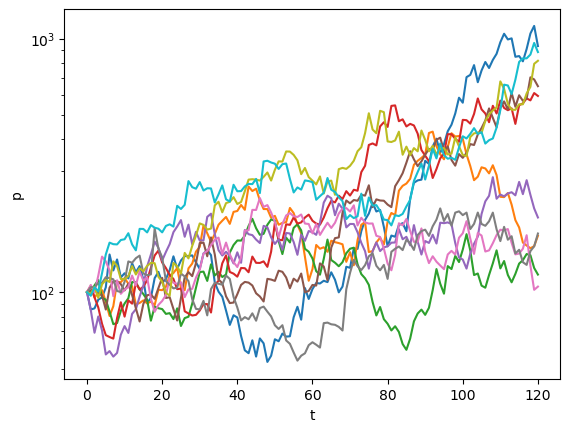

In [12]:
def fgmb(mu, sigma, shape, dt, rng, p0=1.00, p0_first=True, dtype=np.float64):
    """
    Simulate paths for geometric brownian motion.

    Usage:
    
    mu = expected return (per year), not continuously compounded,
         e.g. mu=)0.10 means 10 percent expected return.
    sigma = log (Black-Scholes) volatility (annualized)
    shape = (npaths, nobs), where paths = number of paths, nob = numbe of observations per path.
    dt = time interval (e.g., dt = 1/12 means monthly observations)
    rng = numpy random number generator, e.g. rng = np.random.default_rng(1234). 
    
    output = n+1 x m matrix or n x m matrix, where each of the m columums is a geometric brownian motion path
    starting with a value of p0. Length n or n+1 depends on whether start is included
    
    Notes: 
    
    1. No default argument for rng because one generally wants to use the same rng
    on different function calls to avoid creating correlated paths across different
    function calls!
    
    2. Base time period can be anything, but would typically be annual. 
    The argument dt is a fraction of the based time period.
    
    3. The parameter mu is the mean of the gbm, not the mean of the log of the gbm!
    
    """
    
    res = np.exp((rng.standard_normal(shape, dtype=dtype) * (sigma * np.sqrt(dt)) 
                  + (np.log(1 + mu) - 0.50 * sigma**2) * dt).cumsum(axis=1) + np.log(p0))
    
    if p0_first == True:
        res = np.hstack([np.full((shape[0], 1), p0, dtype=dtype), res])
        
    return res    

def f_test_fgbm():
    
    mu = 0.12
    sigma = 0.35    
    dt = 1.00 / 12.00
    nobs = 120
    npaths = 10
    p0 = 100.00
    dtype = np.float64
    rng = np.random.default_rng(1234)

    shape = (npaths, nobs)

    p = fgmb(mu, sigma, shape, dt, rng, p0, p0_first=True, dtype=dtype)
    
    t = (np.array(np.ones_like(p[0, :])).cumsum() - 1)

    if nobs * npaths < 10**6:    
        %timeit -r 3 -n 5 temp = fgmb(mu, sigma, shape, dt, rng, p0, p0_first=True, dtype=np.float32)
        %timeit -r 3 -n 5 temp = fgmb(mu, sigma, shape, dt, rng, p0, p0_first=True, dtype=np.float64)

        %timeit -r 3 -n 5 temp = fgmb(mu, sigma, shape, dt, rng, p0, p0_first=False, dtype=np.float32)
        %timeit -r 3 -n 5 temp = fgmb(mu, sigma, shape, dt, rng, p0, p0_first=False, dtype=np.float64)
    
    plt.plot(t, p.T)
    plt.xlabel('t')
    plt.ylabel('p')
    plt.yscale('log')
    plt.show()

f_test_fgbm()    

### Problem 5

(Advanced) Write a more efficient algorithm (faster) for the function *fgbm()* than what I have written above.

Hint: This might be difficult because I may have written a reasonably efficient algorithm.


### Equity Premium Puzzle, Raj Mehra

In [13]:
timestamp = datetime.datetime.now().strftime('%Y-%m%d-%H%M')
print("Timestamp:", timestamp)
tfinish = timeit.default_timer()
print(f"Finished: {timestamp = }\nExecution time = {tfinish - tstart} s")


Timestamp: 2024-1101-1715
Finished: timestamp = '2024-1101-1715'
Execution time = 79.45395669993013 s
